In [24]:
import pandas as pd

dmn_coords = [(0, -52, 18), (-46, -68, 32), (46, -68, 32), (1, 50, -5)]
labels = [
    'Posterior Cingulate Cortex',
    'Left Temporoparietal junction',
    'Right Temporoparietal junction',
    'Medial prefrontal cortex',
    ]

In [25]:
from nilearn import datasets

dim = 64
difumo = datasets.fetch_atlas_difumo(
    dimension=dim, resolution_mm=2, legacy_format=False
)

/home/kevrodz/Documents/Master/neuro/lib/python3.10/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


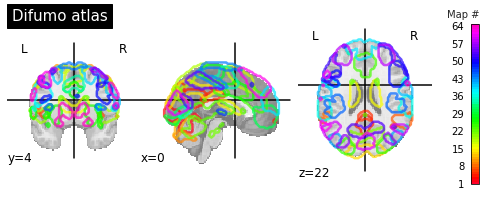

In [26]:
from nilearn import plotting

plotting.plot_prob_atlas(difumo.maps, title="Difumo atlas",colorbar=True)
plotting.show()

In [27]:
from nilearn.maskers import NiftiMapsMasker

# create masker to extract functional data within atlas parcels
masker = NiftiMapsMasker(maps_img=difumo.maps, standardize=True,
                         memory='nilearn_cache')

In [28]:
difumo.maps

'/home/kevrodz/nilearn_data/difumo_atlases/64/2mm/maps.nii.gz'

In [29]:
difumo.labels

component                       difumo_names     yeo_networks7  \
0           1            Superior frontal sulcus          DefaultB   
1           2                     Fusiform gyrus  No network found   
2           3         Calcarine cortex posterior           VisCent   
3           4         Cingulate cortex posterior          DefaultB   
4           5  Parieto-occipital sulcus superior             ContA   
..        ...                                ...               ...   
59         60                             Cuneus           VisCent   
60         61              Middle temporal gyrus          DefaultB   
61         62             Superior frontal gyrus          DefaultB   
62         63                     Central sulcus           SomMotA   
63         64                            Caudate  No network found   

      yeo_networks17        gm        wm       csf  
0           DefaultA  0.689996  0.185709  0.116884  
1   No network found  0.844733  0.021026  0.133789  
2            VisPeri  0.601768  0.302067  0.091297  
3           DefaultA  0.740086  0.140368  0.119567  
4              ContC  0.640157  0.241492  0.117826  
..               ...       ...       ...       ...  
59           VisPeri  0.627179  0.269783  0.103005  
60          DefaultB  0.726527  0.149595  0.107329  
61          DefaultB  0.651182  0.062243  0.224067  
62           SomMotB  0.578502  0.291674  0.109244  
63  No network found  0.703295  0.260386  0.036332  

[64 rows x 7 columns]

In [30]:
masker_GICA_300ROI = NiftiMapsMasker(maps_img='/run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/gICA_300ROI_bin/nets_CN_ADNI3.nii', standardize=True,
                         memory='nilearn_cache')

In [31]:
data = datasets.fetch_development_fmri(n_subjects=10)

print('Functional nifti images (4D, e.g., one subject) are located at : %r'
      % data['func'][0])
print('Counfound csv files (of same subject) are located at : %r'
      % data['confounds'][0])

Functional nifti images (4D, e.g., one subject) are located at : '/home/kevrodz/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
Counfound csv files (of same subject) are located at : '/home/kevrodz/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv'


In [32]:
data

{'func': ['/home/kevrodz/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
  '/home/kevrodz/nilearn_data/development_fmri/development_fmri/sub-pixar124_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
  '/home/kevrodz/nilearn_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
  '/home/kevrodz/nilearn_data/development_fmri/development_fmri/sub-pixar002_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
  '/home/kevrodz/nilearn_data/development_fmri/development_fmri/sub-pixar003_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
  '/home/kevrodz/nilearn_data/development_fmri/development_fmri/sub-pixar004_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
  '/home/kevrodz/nilearn_data/development_fmri/development_fmri/sub-pixar005_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
  '/h

/home/kevrodz/Documents/Master/neuro/lib/python3.10/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


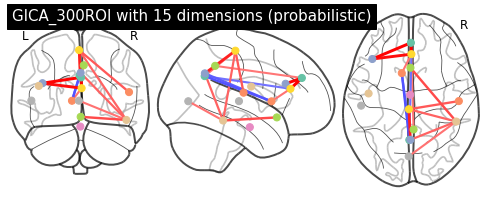

In [33]:
from nilearn.connectome import ConnectivityMeasure

# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(kind='correlation')


# extract time series from all subjects and concatenate them
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker_GICA_300ROI.fit_transform(func, confounds=confounds))

# calculate correlation matrices across subjects and display
correlation_matrices = connectome_measure.fit_transform(time_series)

# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectome_measure.mean_

# grab center coordinates for probabilistic atlas
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img='/run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/gICA_300ROI_bin/nets_CN_ADNI3.nii')

# plot connectome with 85% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="85%",
                         title='GICA_300ROI with {} dimensions (probabilistic)'.format(15))
plotting.show()

In [247]:
mean_correlation_matrix

array([[ 1.        ,  0.2781923 , -0.3504303 , -0.18806806,  0.15847285,
         0.03151843, -0.1669337 , -0.22235775,  0.05345691, -0.23631589,
         0.01665437, -0.21543345, -0.216984  , -0.11809687, -0.08323406],
       [ 0.2781923 ,  1.        , -0.3716844 , -0.02784747,  0.00326199,
         0.05619168, -0.1676561 , -0.16198003, -0.191408  ,  0.22554179,
         0.13064133, -0.12968595,  0.11572918,  0.00358716, -0.02376129],
       [-0.3504303 , -0.3716844 ,  1.        ,  0.05431519, -0.08936088,
        -0.10413008,  0.0344564 ,  0.20621029,  0.25674194, -0.07694951,
         0.04846952,  0.33254296,  0.0096295 ,  0.28224838, -0.06052684],
       [-0.18806806, -0.02784747,  0.05431519,  1.        , -0.20790331,
         0.07989891, -0.14849249,  0.10845973, -0.02345038,  0.15485448,
        -0.08320697,  0.01825623, -0.14231953, -0.02520309,  0.0306437 ],
       [ 0.15847285,  0.00326199, -0.08936088, -0.20790331,  1.        ,
         0.20155755,  0.03929762, -0.11429179, 

In [271]:
# evaluación de convertir matriz de correlacion en una fila y a la vez retornar esa fila a la matriz

matriz_triu = np.triu(mean_correlation_matrix, k=0)
matriz_tril = np.tril(mean_correlation_matrix, k=0)
matriz_diag = np.diag(np.diag(mean_correlation_matrix))
matriz_dim = mean_correlation_matrix.shape[0]
m_flat_column = matriz_tril.flatten()
m_flat_row = m_flat_column.reshape(1, -1) # la que se usa en ComBat
matriz_orig = m_flat_row.reshape(matriz_dim, matriz_dim)
matriz_orig = matriz_orig + matriz_orig.T - matriz_diag
matriz_orig
#matriz_orig
#matriz_en_columna = mean_correlation_matrix.flatten()
#matriz_dim = mean_correlation_matrix.shape[0]
#matriz_en_fila = matriz_en_columna.reshape(1, -1)
#matriz_original = matriz_en_fila.reshape(matriz_dim, matriz_dim)
#matriz_original

array([[ 1.        ,  0.2781923 , -0.3504303 , -0.18806806,  0.15847285,
         0.03151843, -0.1669337 , -0.22235775,  0.05345691, -0.23631589,
         0.01665437, -0.21543345, -0.216984  , -0.11809687, -0.08323406],
       [ 0.2781923 ,  1.        , -0.3716844 , -0.02784747,  0.00326199,
         0.05619168, -0.1676561 , -0.16198003, -0.191408  ,  0.22554179,
         0.13064133, -0.12968595,  0.11572918,  0.00358716, -0.02376129],
       [-0.3504303 , -0.3716844 ,  1.        ,  0.05431519, -0.08936088,
        -0.10413008,  0.0344564 ,  0.20621029,  0.25674194, -0.07694951,
         0.04846952,  0.33254296,  0.0096295 ,  0.28224838, -0.06052684],
       [-0.18806806, -0.02784747,  0.05431519,  1.        , -0.20790331,
         0.07989891, -0.14849249,  0.10845973, -0.02345038,  0.15485448,
        -0.08320697,  0.01825623, -0.14231953, -0.02520309,  0.0306437 ],
       [ 0.15847285,  0.00326199, -0.08936088, -0.20790331,  1.        ,
         0.20155755,  0.03929762, -0.11429179, 

In [257]:
from neuroHarmonize import harmonizationLearn
import pandas as pd
covars = {'batch':[1,2],
          'sex':[1,2],
          'age':[80,85]}
df_covars = pd.DataFrame(covars)
df_covars.head()

batch  sex  age
0      1    1   80
1      2    2   85

In [264]:
np_ts.shape


s_ts = list()
for w in range(slwin_ts.shape[1]): # network
    s_ts = list()
    for subj in range(slwin_ts.shape[0]): # subject
        s_ts.append(slwin_ts[subj][w])

(2, 164, 15)

In [ ]:
my_model, my_data_adj = harmonizationLearn(my_data, covars)

  1 region(s) detected from /run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/gICA_300ROI_bin/nets_CN_ADNI3.nii
[NiftiMapsMasker.fit_transform] loading regions from /run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/gICA_300ROI_bin/nets_CN_ADNI3.nii
[NiftiMapsMasker.fit_transform] loading mask from Nifti1Image(
shape=(99, 117, 95),
affine=array([[   2.,    0.,    0.,  -98.],
       [   0.,    2.,    0., -134.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
Resampling mask


/home/kevrodz/Documents/Master/neuro/lib/python3.10/site-packages/nilearn/_utils/cache_mixin.py:304: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[NiftiMapsMasker.fit_transform] loading regions from /run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/gICA_300ROI_bin/nets_CN_ADNI3.nii
[NiftiMapsMasker.fit_transform] loading mask from Nifti1Image(
shape=(99, 117, 95),
affine=array([[   2.,    0.,    0.,  -98.],
       [   0.,    2.,    0., -134.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
Resampling mask


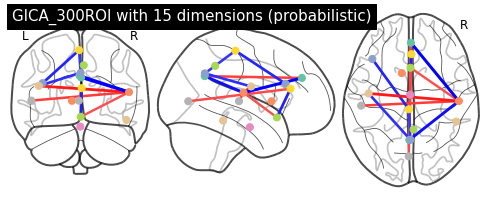

In [224]:
from utils.fmri_signal_extract import signal_extract
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting


subjects_ts = ['/run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/AD_ADNI3_V2/dswau4D_003_S_1074_v164_.nii', '/run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/AD_ADNI3_V2/dswau4D_003_S_6264_v164_.nii']

# ts shape (n_subjects), and in each subject shape (vols, rois)
ts, roi_img, labels, masker_type = signal_extract(subjects_ts, '/run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/gICA_300ROI_bin/nets_CN_ADNI3.nii')

connectome_measure = ConnectivityMeasure(kind='correlation')

correlation_matrices = connectome_measure.fit_transform(ts)
mean_correlation_matrix = connectome_measure.mean_
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img='/run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/gICA_300ROI_bin/nets_CN_ADNI3.nii')

plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="90%",
                         title='GICA_300ROI with {} dimensions (probabilistic)'.format(15))
plotting.show()

<AxesSubplot:>

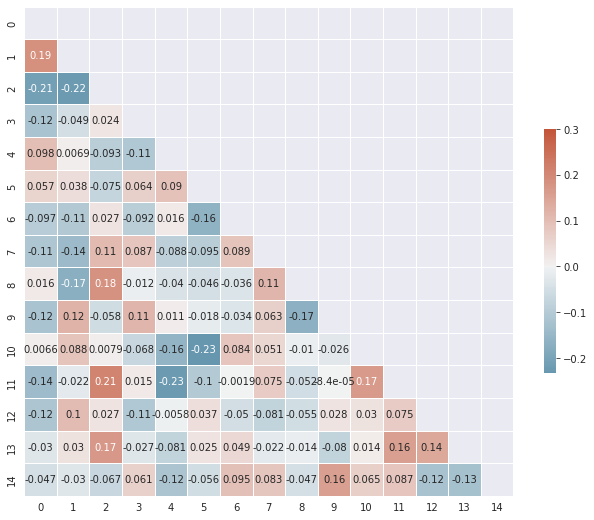

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.triu(np.ones_like(mean_correlation_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(mean_correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [267]:
import numpy as np
from utils.sliding_window_fc import dynamic_functional_connectivity

np_ts = np.asarray(ts)
wl = 164 #20  # window length in vols, in this case for 164 vols with TR=3 the wl = 20 vols = 60 min
ss = 1#10  # window step size in vols
slwin_ts, n_slwin = dynamic_functional_connectivity(np_ts, wl, ss, 'hamming')  # Windowed BOLD time-series

In [268]:
print(slwin_ts.shape)  #(subjects, windows, window length, rois)
print(n_slwin)

(2, 0, 164, 15)
0


In [270]:
sw_ts = list()
for w in range(slwin_ts.shape[1]): # network
    sw_ts = list()
    for subj in range(slwin_ts.shape[0]): # subject
        sw_ts.append(slwin_ts[subj][w])
    connectome_measure = ConnectivityMeasure(kind='correlation')

    correlation_matrices = connectome_measure.fit_transform(sw_ts)
    mean_correlation_matrix = connectome_measure.mean_
    coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img='/run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/gICA_300ROI_bin/nets_CN_ADNI3.nii')
    plotting.plot_connectome(mean_correlation_matrix, coordinates,
                             edge_threshold="90%", edge_vmax=.5, edge_vmin=-.5,
                             title='GICA_300ROI with {} nets. Window {}'.format(15, w))
    plotting.show()

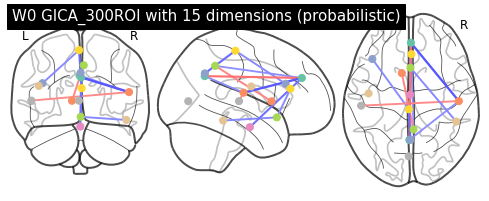

<AxesSubplot:>

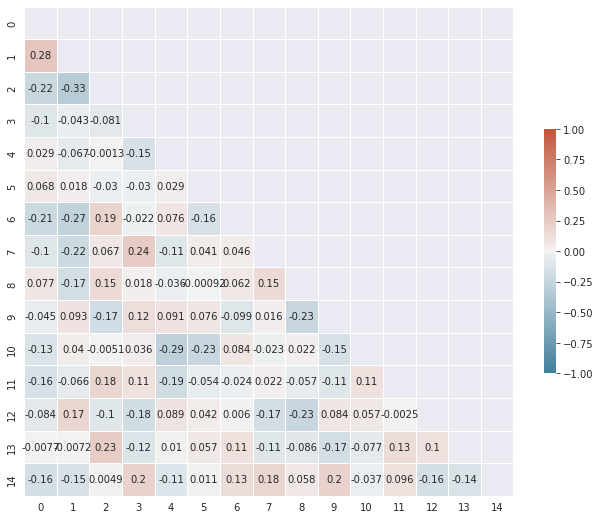

In [39]:
sw_connectome_measure = ConnectivityMeasure(kind='correlation')

sw_correlation_matrices = sw_connectome_measure.fit_transform(slwin_ts[:][0])
sw_mean_correlation_matrix = sw_connectome_measure.mean_
coordinates = plotting.find_probabilistic_atlas_cut_coords(
    maps_img='/run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/gICA_300ROI_bin/nets_CN_ADNI3.nii')

plotting.plot_connectome(sw_mean_correlation_matrix, coordinates,
                         edge_threshold="90%", edge_vmax=.5, edge_vmin=-.5,
                         title='W0 GICA_300ROI with {} dimensions (probabilistic)'.format(15))
plotting.show()

view = plotting.view_connectome(sw_mean_correlation_matrix, coordinates, edge_threshold='80%')
view

mask = np.triu(np.ones_like(sw_mean_correlation_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sw_mean_correlation_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


In [41]:
view

In [42]:
slwin_ts[1][13]  #subjt 1, window 38

array([[ 1.19918575e-01,  8.41558456e-03, -8.36931419e-02,
        -5.49617290e-02,  6.96923065e-02, -4.31940126e-02,
         3.85869741e-02, -1.96787333e-02,  1.65549374e-02,
         2.37337542e-02,  9.21301544e-03, -1.01340981e-01,
        -1.14988565e-01, -4.47714806e-02,  8.56368351e-02],
       [ 1.04140410e-01, -6.64433884e-03, -2.83317255e-01,
        -3.55422721e-02,  1.80551203e-01,  1.22321452e-01,
         7.55963399e-02, -1.72938080e-01, -7.69792784e-02,
        -5.34316424e-02, -2.06941922e-01, -1.93236089e-01,
        -4.36086962e-03, -6.98897060e-02,  3.58505549e-02],
       [-3.81221292e-02, -2.68376779e-02, -3.04332107e-01,
         2.65413699e-02,  5.80440478e-02,  3.90610883e-01,
         2.40387723e-02, -2.52136416e-01, -6.93380730e-04,
        -1.33192673e-01, -4.44295586e-01, -1.77139813e-01,
         2.85958690e-01,  5.68131510e-02, -1.79790584e-01],
       [-4.88849865e-01, -1.12527133e-01,  7.28736789e-02,
         3.58290538e-01, -3.40526967e-01,  3.00034536

In [43]:
slwin = slwin_ts.reshape(slwin_ts.shape[0]*n_slwin,wl,slwin_ts.shape[3])
slwin.shape

(28, 20, 15)

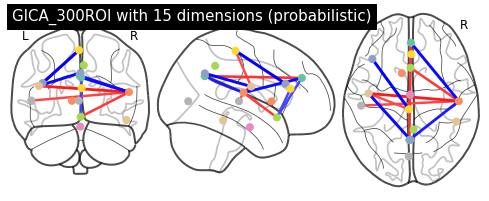

In [44]:
correlation_matrices = connectome_measure.fit_transform(slwin)
mean_correlation_matrix = connectome_measure.mean_
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img='/run/media/kevrodz/Salvador/ADNI3_KEV_CLAUDIA/gICA_300ROI_bin/nets_CN_ADNI3.nii')

plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="90%",
                         title='GICA_300ROI with {} dimensions (probabilistic)'.format(15))
plotting.show()

# LAG

/home/kevrodz/Documents/Master/neuro/lib/python3.10/site-packages/nilearn/plotting/displays/_projectors.py:166: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(("'adjacency_matrix' is not symmetric. "


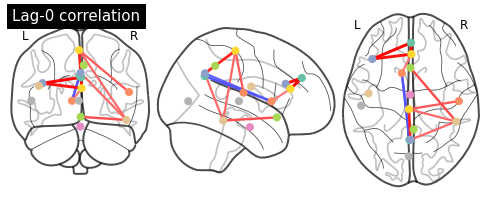

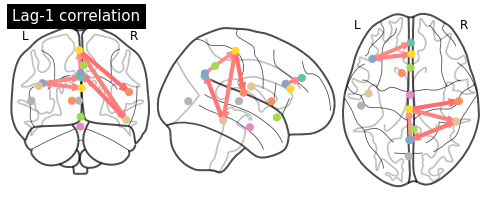

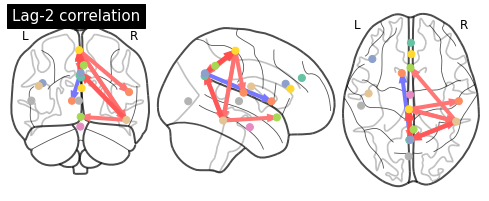

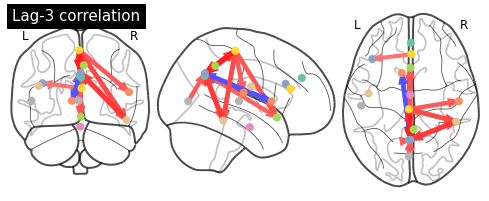

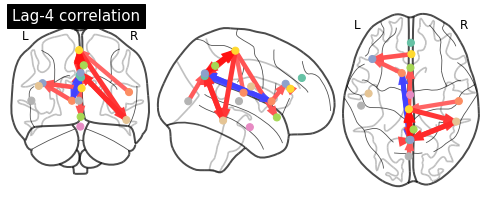

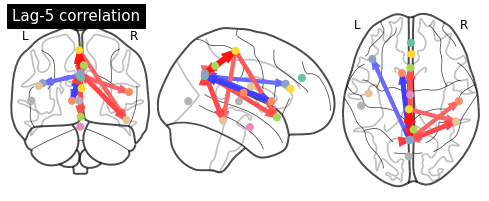

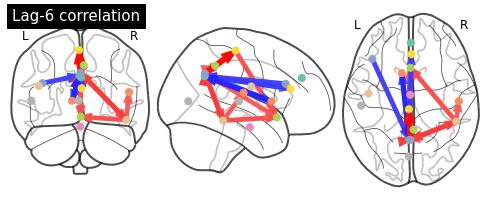

In [45]:
import numpy as np

# Define a custom function to compute lag correlation on the time series
def lag_correlation(time_series, lag):
    n_subjects = len(time_series)
    n_samples, n_features = time_series[0].shape
    lag_cor = np.zeros((n_subjects, n_features, n_features))
    for subject, serie in enumerate(time_series):
        for i in range(n_features):
            for j in range(n_features):
                if lag == 0:
                    lag_cor[subject, i, j] = np.corrcoef(serie[:, i],
                                                         serie[:, j])[0, 1]
                else:
                    lag_cor[subject, i, j] = np.corrcoef(serie[lag:, i],
                                                         serie[:-lag, j])[0, 1]
    return np.mean(lag_cor, axis=0)

# Compute lag-0 and lag-1 correlations and plot associated connectomes
for lag in [0, 1, 2, 3, 4, 5, 6]:
    lag_correlation_matrix = lag_correlation(time_series, lag)
    plotting.plot_connectome(lag_correlation_matrix, coordinates,
                             edge_threshold="90%",
                             title='Lag-{} correlation'.format(
                                 lag))

In [46]:
time_series[0].shape

(168, 15)

# GRAPHS

In [74]:
import networkx as nx
from nltools.data import Adjacency, Brain_Data
from nltools.mask import expand_mask, roi_to_brain

In [54]:
labels = ['PMN',
          'DMN',
          'Auditoy',
          'Cingulo Opercular',
          'Dorsal Attention',
          'Fronto Parietal',
          'MTL',
          'Parieto Medial',
          'Reward',
          'Salience',
          'Somatomotor Dorsal',
          'Somatomotor Lateral',
          'Unassigned',
          'Ventral Attention',
          'Visual']

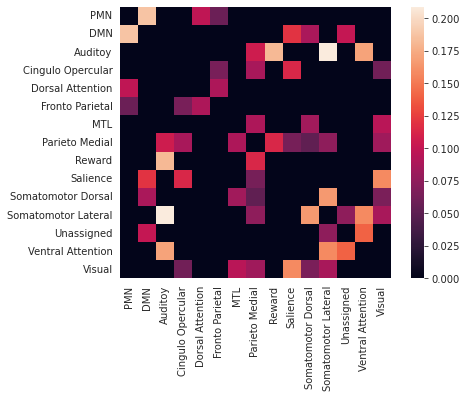

In [179]:
a = Adjacency(mean_correlation_matrix, matrix_type="distance", labels=labels)
a_thresholded = a.threshold(upper=0.05, binarize=False)

a_thresholded.plot()

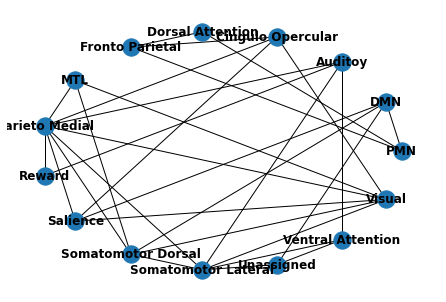

In [180]:
g = a_thresholded.to_graph()
nx.draw_circular(g,with_labels=True, font_weight='bold')

In [209]:
edges = [(a,b) for (a,b) in g.edges() if a != b]
edges

[('PMN', 'DMN'),
 ('PMN', 'Dorsal Attention'),
 ('PMN', 'Fronto Parietal'),
 ('DMN', 'Salience'),
 ('DMN', 'Somatomotor Dorsal'),
 ('DMN', 'Unassigned'),
 ('Auditoy', 'Parieto Medial'),
 ('Auditoy', 'Reward'),
 ('Auditoy', 'Somatomotor Lateral'),
 ('Auditoy', 'Ventral Attention'),
 ('Cingulo Opercular', 'Fronto Parietal'),
 ('Cingulo Opercular', 'Parieto Medial'),
 ('Cingulo Opercular', 'Salience'),
 ('Cingulo Opercular', 'Visual'),
 ('Dorsal Attention', 'Fronto Parietal'),
 ('MTL', 'Parieto Medial'),
 ('MTL', 'Somatomotor Dorsal'),
 ('MTL', 'Visual'),
 ('Parieto Medial', 'Reward'),
 ('Parieto Medial', 'Salience'),
 ('Parieto Medial', 'Somatomotor Dorsal'),
 ('Parieto Medial', 'Somatomotor Lateral'),
 ('Parieto Medial', 'Visual'),
 ('Salience', 'Visual'),
 ('Somatomotor Dorsal', 'Somatomotor Lateral'),
 ('Somatomotor Dorsal', 'Visual'),
 ('Somatomotor Lateral', 'Unassigned'),
 ('Somatomotor Lateral', 'Ventral Attention'),
 ('Somatomotor Lateral', 'Visual'),
 ('Unassigned', 'Ventral Att

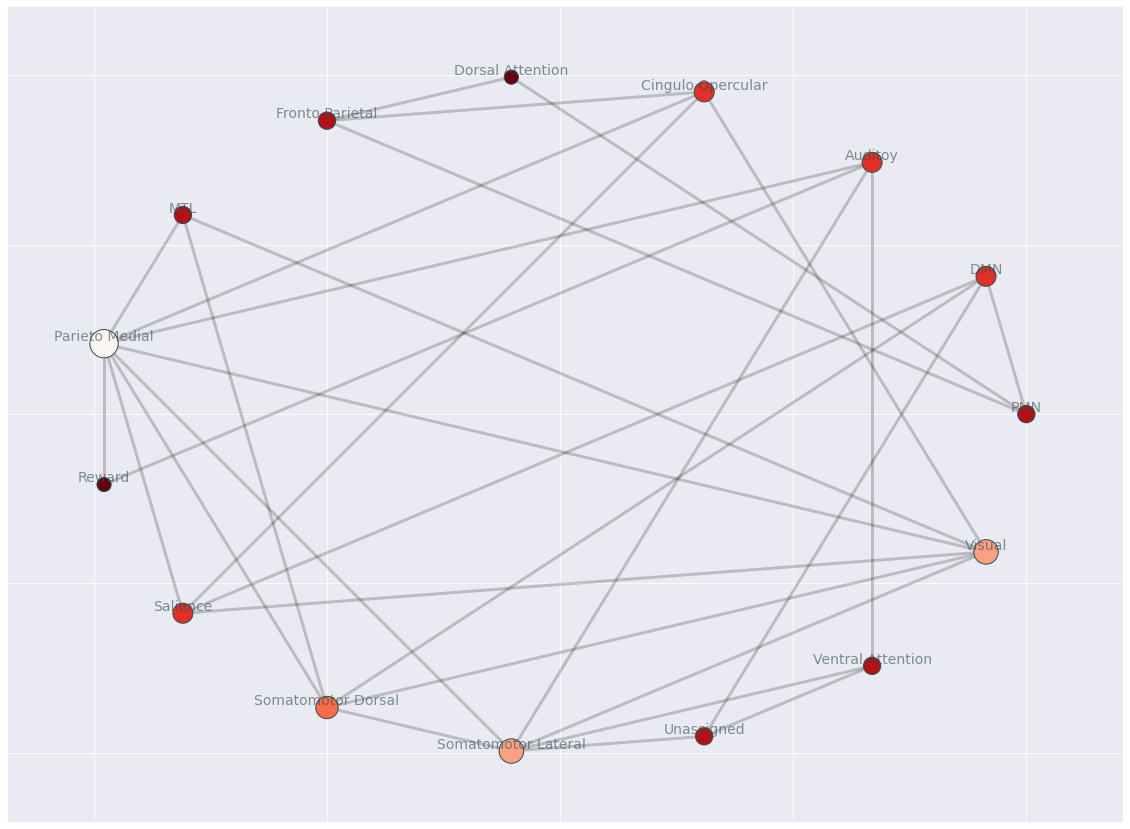

In [206]:
plt.figure(figsize=(20,15))
pos = nx.kamada_kawai_layout(g)
node_and_degree = g.degree()
nx.draw_networkx_edges(g, nx.circular_layout(g), width=3, alpha=.2, connectionstyle='arc3')
nx.draw_networkx_labels(g, nx.circular_layout(g), font_size=14, font_color='darkslategray', alpha=0.6, verticalalignment='bottom')

nx.draw_networkx_nodes(g, nx.circular_layout(g), nodelist=list(dict(node_and_degree).keys()),
                       node_size=[x[1]*100 for x in node_and_degree],
                       node_color=list(dict(node_and_degree).values()),
                       cmap=plt.cm.Reds_r, linewidths=1, edgecolors='darkslategray', alpha=1)

In [188]:
pos

{'PMN': array([-0.10780665,  0.87663808]),
 'DMN': array([ 0.30913335, -0.05215807]),
 'Auditoy': array([ 0.45512432, -0.30718555]),
 'Cingulo Opercular': array([-0.08449429,  0.36083348]),
 'Dorsal Attention': array([0.26988217, 1.        ]),
 'Fronto Parietal': array([0.00963311, 0.65282263]),
 'MTL': array([-0.5053265 ,  0.12320237]),
 'Parieto Medial': array([-0.14256435, -0.14192462]),
 'Reward': array([-0.58454784, -0.56566127]),
 'Salience': array([-0.39401104, -0.16915587]),
 'Somatomotor Dorsal': array([-0.1728448 ,  0.03486498]),
 'Somatomotor Lateral': array([ 0.03279989, -0.38409043]),
 'Unassigned': array([ 0.28248431, -0.58748308]),
 'Ventral Attention': array([ 0.61095559, -0.97030659]),
 'Visual': array([0.02158272, 0.12960394])}

Text(0.5, 0, 'Degree')

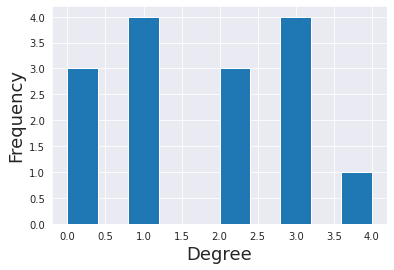

In [161]:
plt.hist(dict(g.degree).values())
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Degree', fontsize=18)

In [171]:
degree = pd.Series(dict(g.degree()), name='degree').to_frame()
degree

degree
PMN                       1
DMN                       3
Auditoy                   4
Cingulo Opercular         1
Dorsal Attention          0
Fronto Parietal           0
MTL                       0
Parieto Medial            2
Reward                    2
Salience                  3
Somatomotor Dorsal        1
Somatomotor Lateral       3
Unassigned                2
Ventral Attention         3
Visual                    1

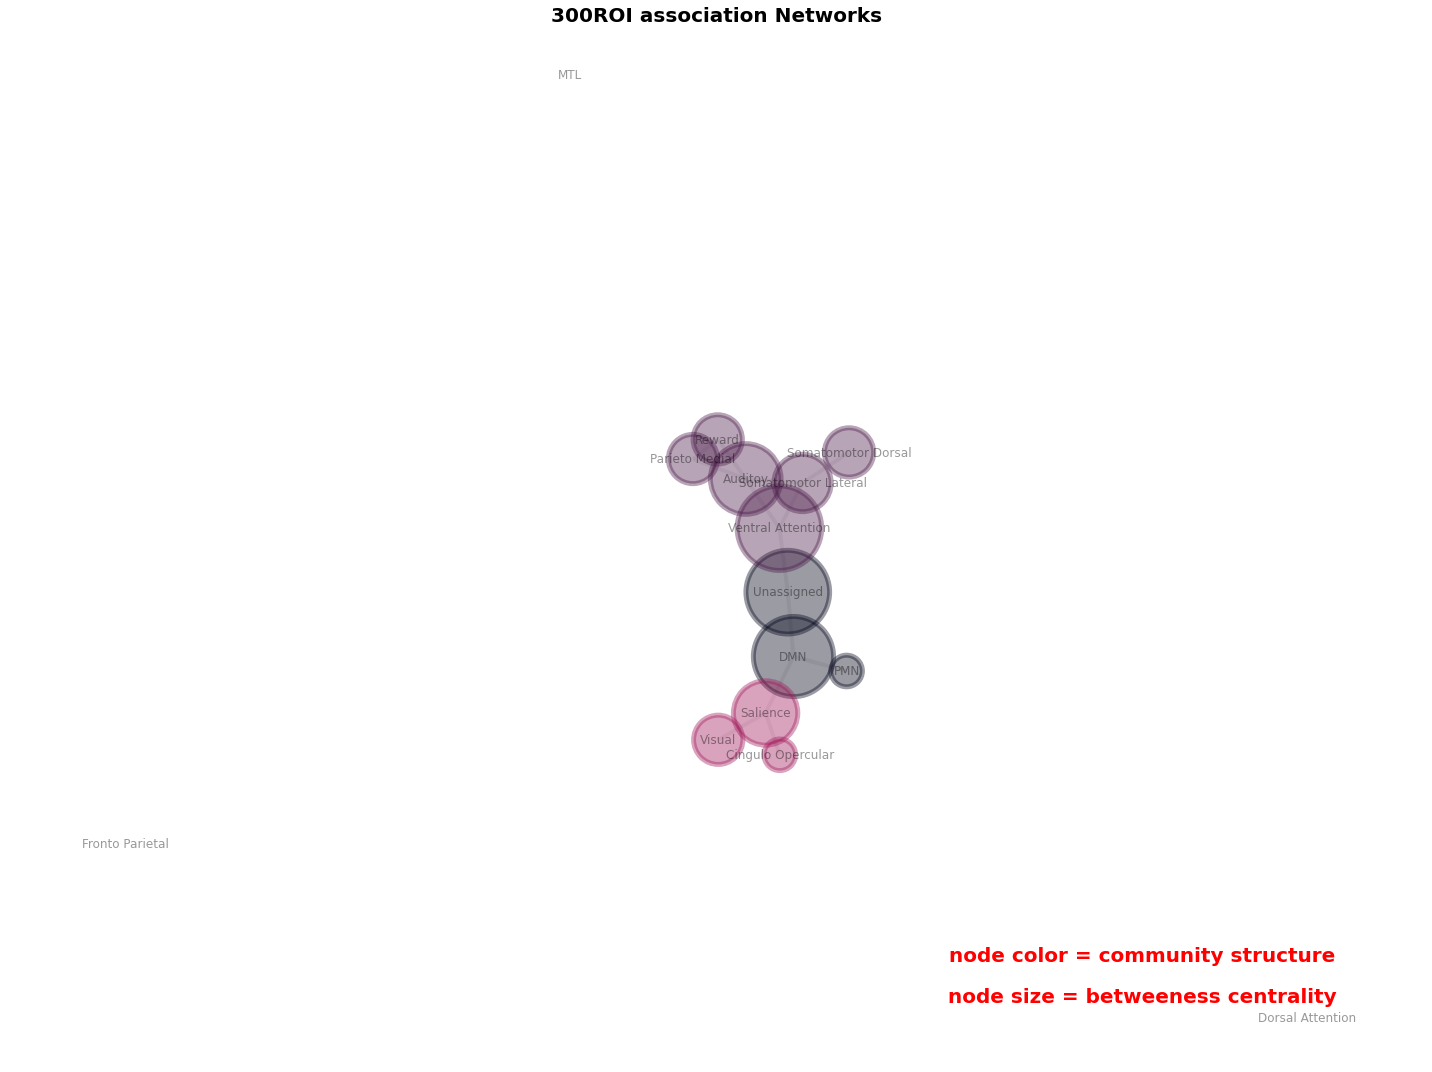

In [163]:
# compute centrality
centrality = nx.betweenness_centrality(g, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(g)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(g, k=0.15, seed=4572321)
node_color = [community_index[n] for n in g]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    g,
    pos=pos,
    with_labels=True,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
    linewidths=5,
    width=4
)
# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("300ROI association Networks", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

In [164]:
centrality

{'PMN': 0.05,
 'DMN': 0.32142857142857145,
 'Auditoy': 0.25,
 'Cingulo Opercular': 0.05,
 'Dorsal Attention': 0.0,
 'Fronto Parietal': 0.0,
 'MTL': 0.0,
 'Parieto Medial': 0.12142857142857144,
 'Reward': 0.12142857142857144,
 'Salience': 0.20714285714285716,
 'Somatomotor Dorsal': 0.12142857142857144,
 'Somatomotor Lateral': 0.1642857142857143,
 'Unassigned': 0.35000000000000003,
 'Ventral Attention': 0.35714285714285715,
 'Visual': 0.12142857142857144}

Betweenness
PMN 0.000
DMN 0.341
Auditoy 0.198
Cingulo Opercular 0.000
Dorsal Attention 0.000
Fronto Parietal 0.000
MTL 0.000
Parieto Medial 0.000
Reward 0.000
Salience 0.209
Somatomotor Dorsal 0.000
Somatomotor Lateral 0.110
Unassigned 0.330
Ventral Attention 0.330
Visual 0.000
Degree centrality
PMN 0.071
DMN 0.214
Auditoy 0.286
Cingulo Opercular 0.071
Dorsal Attention 0.000
Fronto Parietal 0.000
MTL 0.000
Parieto Medial 0.143
Reward 0.143
Salience 0.214
Somatomotor Dorsal 0.071
Somatomotor Lateral 0.214
Unassigned 0.143
Ventral Attention 0.214
Visual 0.071
Closeness centrality
PMN 0.234
DMN 0.320
Auditoy 0.298
Cingulo Opercular 0.201
Dorsal Attention 0.000
Fronto Parietal 0.000
MTL 0.000
Parieto Medial 0.227
Reward 0.227
Salience 0.262
Somatomotor Dorsal 0.216
Somatomotor Lateral 0.288
Unassigned 0.346
Ventral Attention 0.346
Visual 0.201


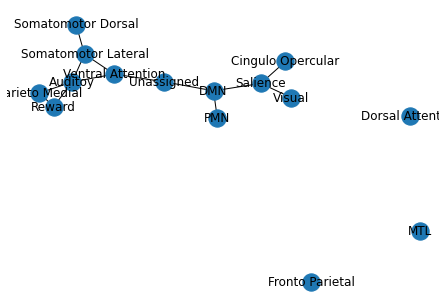

In [165]:
print("Betweenness")
b = nx.betweenness_centrality(g)
for v in g.nodes():
    print(f"{v:2} {b[v]:.3f}")

print("Degree centrality")
d = nx.degree_centrality(g)
for v in g.nodes():
    print(f"{v:2} {d[v]:.3f}")

print("Closeness centrality")
c = nx.closeness_centrality(g)
for v in g.nodes():
    print(f"{v:2} {c[v]:.3f}")

pos = nx.spring_layout(g, seed=367)  # Seed layout for reproducibility
nx.draw(g, pos, with_labels=True)
plt.show()

In [166]:


def graph_partitioning(G, plotting=True):
    """Partition a directed graph into a list of subgraphs that contain
    only entirely supported or entirely unsupported nodes.
    """
    # Categorize nodes by their node_type attribute
    supported_nodes = {n for n, d in G.nodes(data="node_type") if d == "supported"}
    unsupported_nodes = {n for n, d in G.nodes(data="node_type") if d == "unsupported"}

    # Make a copy of the graph.
    H = G.copy()
    # Remove all edges connecting supported and unsupported nodes.
    H.remove_edges_from(
        (n, nbr, d)
        for n, nbrs in G.adj.items()
        if n in supported_nodes
        for nbr, d in nbrs.items()
        if nbr in unsupported_nodes
    )
    H.remove_edges_from(
        (n, nbr, d)
        for n, nbrs in G.adj.items()
        if n in unsupported_nodes
        for nbr, d in nbrs.items()
        if nbr in supported_nodes
    )

    # Collect all removed edges for reconstruction.
    G_minus_H = nx.DiGraph()
    G_minus_H.add_edges_from(set(G.edges) - set(H.edges))

    if plotting:
        # Plot the stripped graph with the edges removed.
        _node_colors = [c for _, c in H.nodes(data="node_color")]
        _pos = nx.spring_layout(H)
        plt.figure(figsize=(8, 8))
        nx.draw_networkx_edges(H, _pos, alpha=0.3, edge_color="k")
        nx.draw_networkx_nodes(H, _pos, node_color=_node_colors)
        nx.draw_networkx_labels(H, _pos, font_size=14)
        plt.axis("off")
        plt.title("The stripped graph with the edges removed.")
        plt.show()
        # Plot the the edges removed.
        _pos = nx.spring_layout(G_minus_H)
        plt.figure(figsize=(8, 8))
        ncl = [G.nodes[n]["node_color"] for n in G_minus_H.nodes]
        nx.draw_networkx_edges(G_minus_H, _pos, alpha=0.3, edge_color="k")
        nx.draw_networkx_nodes(G_minus_H, _pos, node_color=ncl)
        nx.draw_networkx_labels(G_minus_H, _pos, font_size=14)
        plt.axis("off")
        plt.title("The removed edges.")
        plt.show()

    # Find the connected components in the stripped undirected graph.
    # And use the sets, specifying the components, to partition
    # the original directed graph into a list of directed subgraphs
    # that contain only entirely supported or entirely unsupported nodes.
    subgraphs = [
        H.subgraph(c).copy() for c in nx.connected_components(H.to_undirected())
    ]

    return subgraphs, G_minus_H

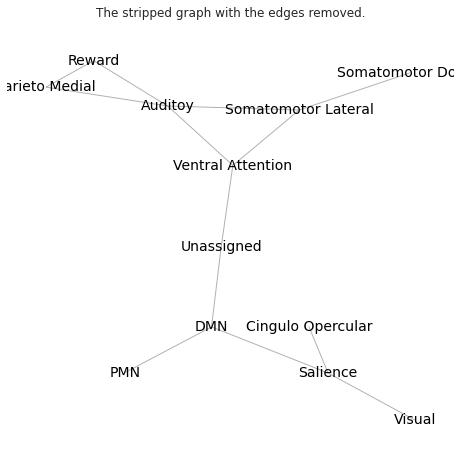

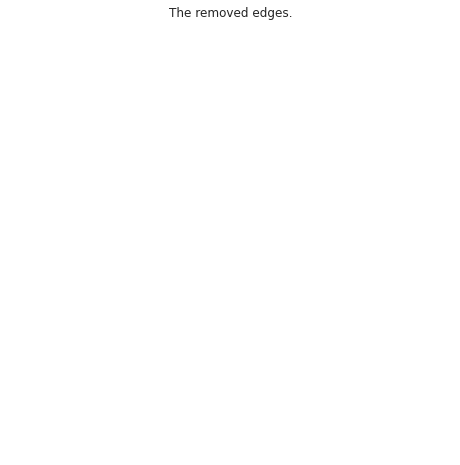

In [167]:
subgraphs_of_G_ex, removed_edges = graph_partitioning(g, plotting=True)